source code:
https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true&scrollTo=-HJV4JF789aC


In [1]:
 # TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# plt.figure()
# plt.imshow(train_images[1])
# plt.colorbar()
# # plt.grid(False)
# plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=11)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/11
1875/1875 [==============================] - 1s 489us/step - loss: 0.4975 - accuracy: 0.8266
Epoch 2/11
1875/1875 [==============================] - 1s 481us/step - loss: 0.3767 - accuracy: 0.8641
Epoch 3/11
1875/1875 [==============================] - 1s 489us/step - loss: 0.3401 - accuracy: 0.8766
Epoch 4/11
1875/1875 [==============================] - 1s 489us/step - loss: 0.3126 - accuracy: 0.8855
Epoch 5/11
1875/1875 [==============================] - 1s 474us/step - loss: 0.2959 - accuracy: 0.8913
Epoch 6/11
1875/1875 [==============================] - 1s 522us/step - loss: 0.2833 - accuracy: 0.8951
Epoch 7/11
1875/1875 [==============================] - 1s 512us/step - loss: 0.2700 - accuracy: 0.8993
Epoch 8/11
1875/1875 [==============================] - 1s 480us/step - loss: 0.2576 - accuracy: 0.9032
Epoch 9/11
1875/1875 [==============================] - 1s 476us/step - loss: 0.2507 - accuracy: 0.9062
Epoch 10/11
1875/1875 [==============================] - 1s 506u

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 347us/step - loss: 0.3375 - accuracy: 0.8838
Test accuracy: 0.8838000297546387


1/1 [==============================] - 0s 11ms/step
Excpected: Sneaker
Guess: Sneaker


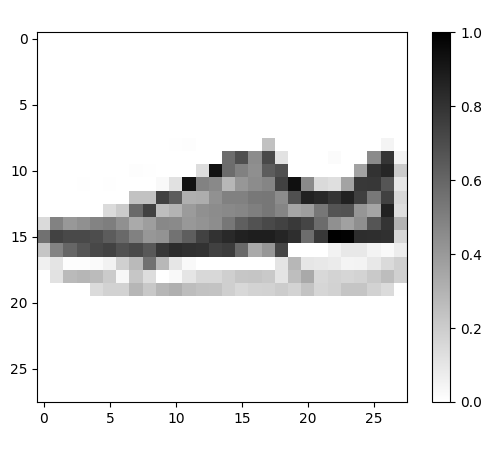

In [15]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  print("Excpected: " + label)
  print("Guess: " + guess)
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label) 
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
#   plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)